In [5]:
import numpy as np
import pandas as pd

# import dataset and print shape, info, and head() 
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# split the dataset into train test split and print X_train shape and X_test shape
from sklearn.model_selection import train_test_split
passenger_info = ['PassengerId','Pclass','Name','Sex','Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
x = titanic[passenger_info]
y = titanic['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

# printing out train and test sets
print('x_train : ')
print(x_train.head())
print(x_train.shape)
 
print('')
print('x_test : ')
print(x_test.head())
print(x_test.shape)

x_train : 
     PassengerId  Pclass                             Name     Sex   Age  \
105          106       3            Mionoff, Mr. Stoytcho    male  28.0   
68            69       3  Andersson, Miss. Erna Alexandra  female  17.0   
253          254       3         Lobb, Mr. William Arthur    male  30.0   
320          321       3               Dennis, Mr. Samuel    male  22.0   
706          707       2    Kelly, Mrs. Florence "Fannie"  female  45.0   

     SibSp  Parch     Ticket     Fare Cabin Embarked  
105      0      0     349207   7.8958   NaN        S  
68       4      2    3101281   7.9250   NaN        S  
253      1      0  A/5. 3336  16.1000   NaN        S  
320      0      0  A/5 21172   7.2500   NaN        S  
706      0      0     223596  13.5000   NaN        S  
(668, 11)

x_test : 
     PassengerId  Pclass                                            Name  \
495          496       3                           Yousseff, Mr. Gerious   
648          649       3           

In [34]:
# are there missing values?
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
# describe x_train
x_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,535.000000,668.000000,668.000000,668.000000
mean,445.911677,2.305389,29.900000,0.534431,0.392216,32.373621
std,259.966783,0.837377,14.487993,1.161739,0.822509,50.632021
min,1.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,216.250000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,445.500000,3.000000,29.000000,0.000000,0.000000,14.500000
75%,674.500000,3.000000,38.000000,1.000000,0.000000,31.275000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200


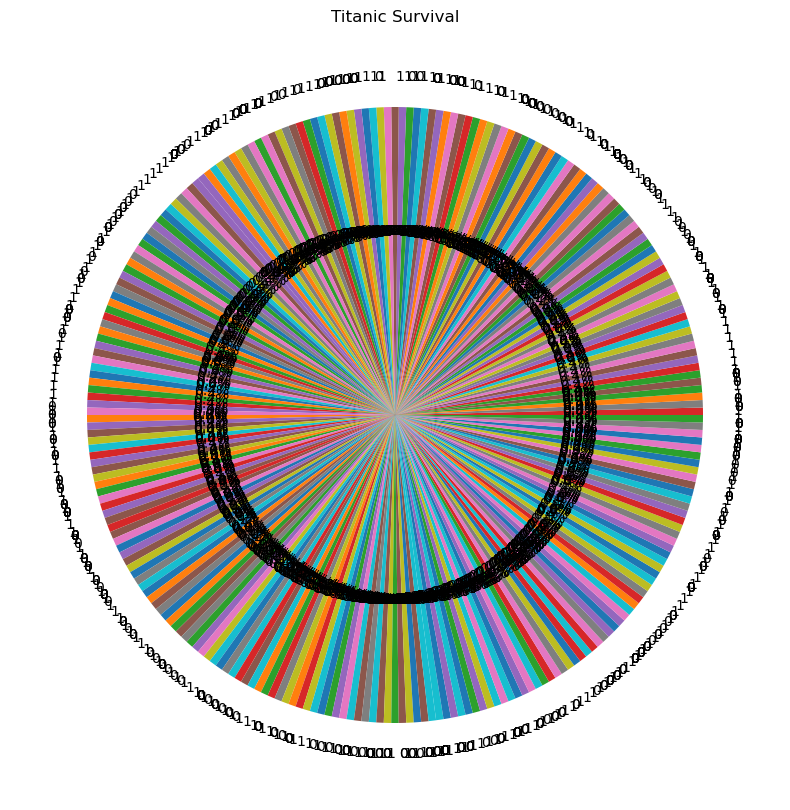

In [77]:
# use a pie chart to visualize y_train
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.pie(y_train, labels=y_train, startangle=180, autopct='%.01f%%')
plt.title('Titanic Survival') 
plt.show()

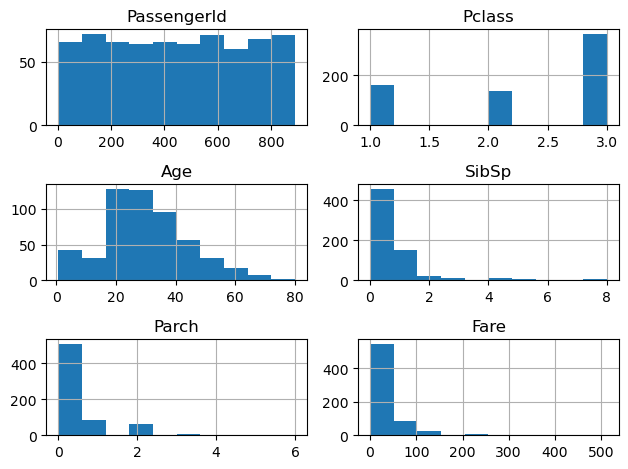

In [42]:
# show histograms of at least three numerical variables, make a comment if they look normal or skewed
#Age and the passenger ID are being distributed evenly while the rest of other categories are skewed to the right.
#Since majority has a “tail” on the right side of the distribution. As the mean are greater than the median.
x_train.hist()
plt.tight_layout()

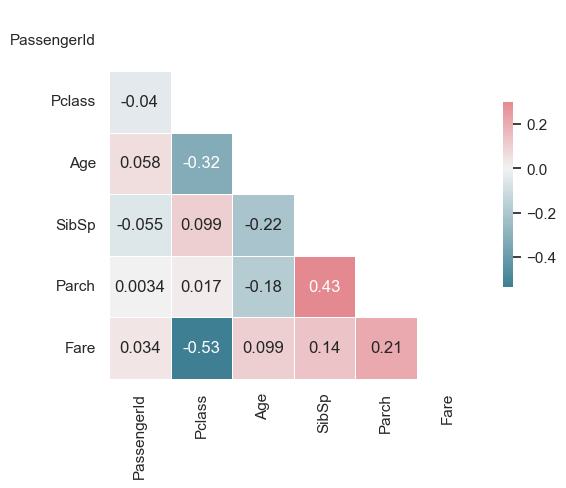

In [87]:
# show a correlation heat map of the numerical variables in X_train
import seaborn as sns
sns.set(style="white")

# compute the correlation matrix
corr = x_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots()

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

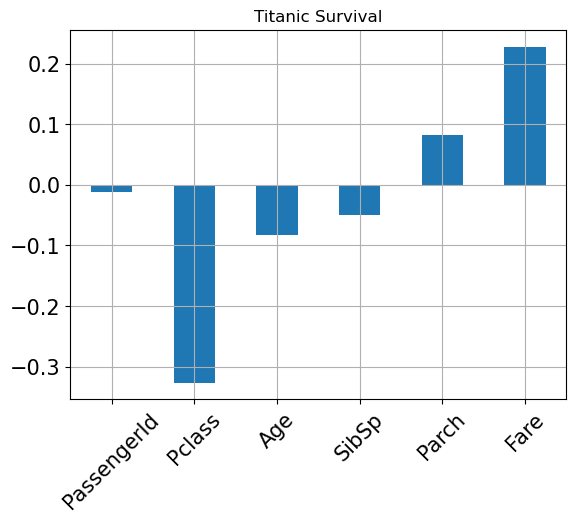

In [44]:
# show a chart using X_train.corrwith(y_train).plot.bar
x_train.corrwith(y_train).plot.bar(
        title = "Titanic Survival", fontsize = 15,
        rot = 45, grid = True);
